<a href="https://colab.research.google.com/github/Papagoat/algo-trading-strategies/blob/main/SMA300_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import yfinance as yf
import time
import requests
import io

In [3]:
start = datetime.datetime(2010,2,1)
end = datetime.datetime.now()

In [ ]:
tsla_historical_data = yf.download(tickers="TSLA",start=start, end=end)

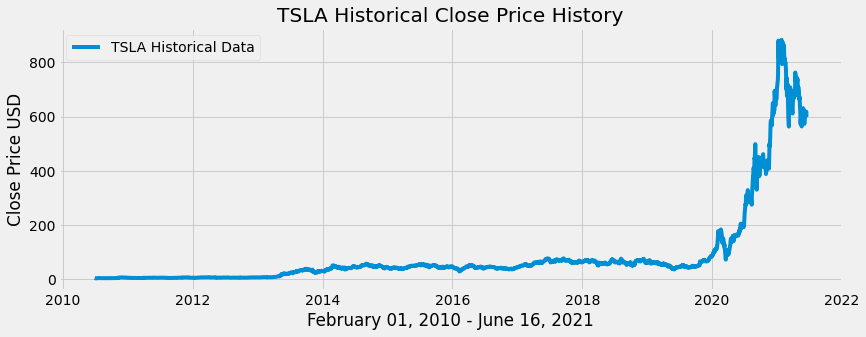

In [5]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(tsla_historical_data['Close'], label='TSLA Historical Data')
plt.title('TSLA Historical Close Price History')
plt.xlabel(f'{start.strftime("%B %d, %Y")} - {datetime.datetime.now().strftime("%B %d, %Y")}')
plt.ylabel('Close Price USD')
plt.legend(loc='upper left')
plt.show()

In [6]:
SMA30 = pd.DataFrame()
SMA30['Close Price'] = tsla_historical_data['Adj Close'].rolling(window=30).mean()
SMA30 = SMA30.dropna()

In [7]:
SMA100 = pd.DataFrame()
SMA100['Close Price'] = tsla_historical_data['Adj Close'].rolling(window=100).mean()
SMA100 = SMA100.dropna()

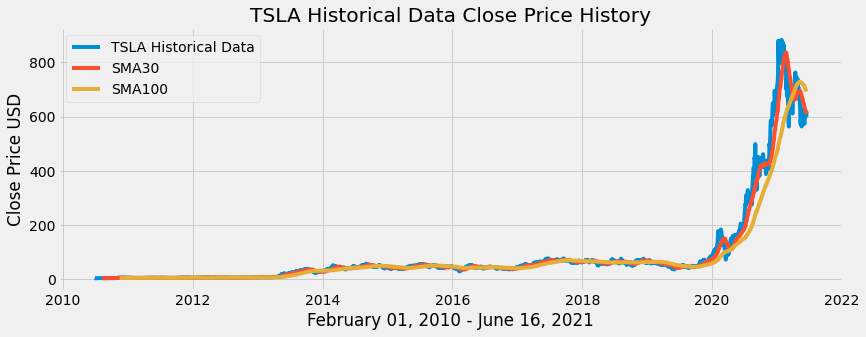

In [8]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(tsla_historical_data['Adj Close'], label='TSLA Historical Data')
plt.plot(SMA30['Close Price'], label='SMA30')
plt.plot(SMA100['Close Price'], label='SMA100')
plt.title('TSLA Historical Data Close Price History')
plt.xlabel(f'{start.strftime("%B %d, %Y")} - {datetime.datetime.now().strftime("%B %d, %Y")}')
plt.ylabel('Close Price USD')
plt.legend(loc='upper left')
plt.show()

In [ ]:
data = pd.DataFrame()
data['TSLA'] = tsla_historical_data['Adj Close']
data['SMA30'] = SMA30['Close Price']
data['SMA100'] = SMA100['Close Price']
data = data.dropna()

In [10]:
def buy_sell(data):
  sig_price_buy = []
  sig_price_sell = []
  flag = False

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if not flag:
        sig_price_buy.append(data['TSLA'][i])
        sig_price_sell.append(np.nan)
        flag = True
      else:
        sig_price_buy.append(np.nan)
        sig_price_sell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag:
        sig_price_buy.append(np.nan)
        sig_price_sell.append(data['TSLA'][i])
        flag = False
      else:
        sig_price_buy.append(np.nan)
        sig_price_sell.append(np.nan)
    else:
        sig_price_buy.append(np.nan)
        sig_price_sell.append(np.nan)

  return(sig_price_buy, sig_price_sell)

In [11]:
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

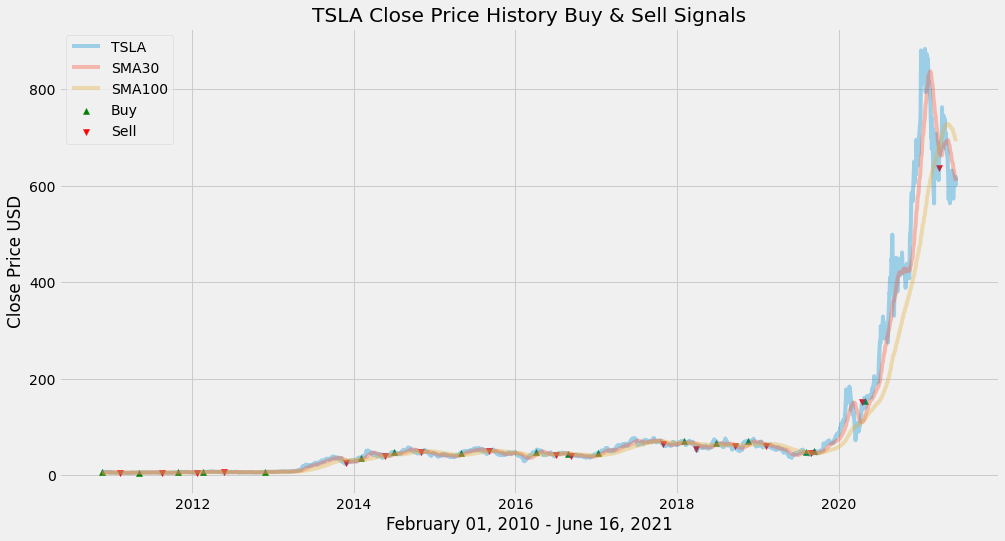

In [13]:
plt.figure(figsize=(15, 8))
plt.plot(data['TSLA'], label='TSLA', alpha=0.35)
plt.plot(data['SMA30'], label='SMA30', alpha=0.35)
plt.plot(data['SMA100'], label='SMA100', alpha=0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label='Buy', marker='^', color='green')
plt.scatter(data.index, data['Sell_Signal_Price'], label='Sell', marker='v', color='red')
plt.title('TSLA Close Price History Buy & Sell Signals')
plt.xlabel(f'{start.strftime("%B %d, %Y")} - {datetime.datetime.now().strftime("%B %d, %Y")}')
plt.ylabel('Close Price USD')
plt.legend(loc='upper left')
plt.show()